**INSTRUCTIONS FOR USE**
1. Go to this Google Drive folder. https://drive.google.com/drive/folders/166oZ6VgV8mOxeaG9TQTXTeABzFvad_0d?usp=sharing
2. Click the dropdown arrow next to the folder name at the top, and click Organize --> Add Shortcut. Add the Shortcut to your home (main) Google Drive folder.
3. Run the code below. (We know this is a little clunky, we'll properly integrate via Github in the future.)

In [2]:
import os
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  print('Running on Colab... Preparing to mount Google Drive')
  from google.colab import drive
  drive.mount('/content/drive')

  !apt-get install git
  !pip install pupil-apriltags
  !git clone https://github.com/ahmtox/stereo-matching.git

  sys.path.append('/content/stereo-matching')

  print('Google Drive mounted at /content/drive')
else:
  print('Not running on Google Colab.')


Running on Colab... Preparing to mount Google Drive
Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.5 MB/s eta 0:00:00
Cloning into 'stereo-matching'...
remote: Enumerating objects: 41905, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 41905 (delta 13), reused 33 (delta 8), pack-reused 41867
Receiving objects: 100% (41905/41905), 176.99 MiB | 22.20 MiB/s, done.
Resolving deltas: 100% (23283/23283), done.
Updating files: 100% (39735/39735), done.
Google Drive mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from camera_calibration import CameraCalibration
from stereogram_generator import StereogramGenerator
from stereo_calibration import stereo_calibrate

In [ ]:
if IN_COLAB:
  imgL_path = 'drive/MyDrive/ES143Final/camera_left/IMG_4014.jpeg'
  imgR_path = 'drive/MyDrive/ES143Final/camera_right/IMG_7002.jpeg'
  calib_left_camera_filepath = 'drive/MyDrive/ES143Final/camera_left/Calibration/IMG_*.jpeg'
  calib_right_camera_filepath = 'drive/MyDrive/ES143Final/camera_right/Calibration/IMG_*.jpeg'

else:
  imgL_path = 'camera_left/IMG_4014.jpeg'
  imgR_path = 'camera_right/IMG_7002.jpeg'
  calib_left_camera_filepath = 'camera_left/calibration/IMG_*.jpeg'
  calib_right_camera_filepath = 'camera_right/calibration/IMG_*.jpeg'

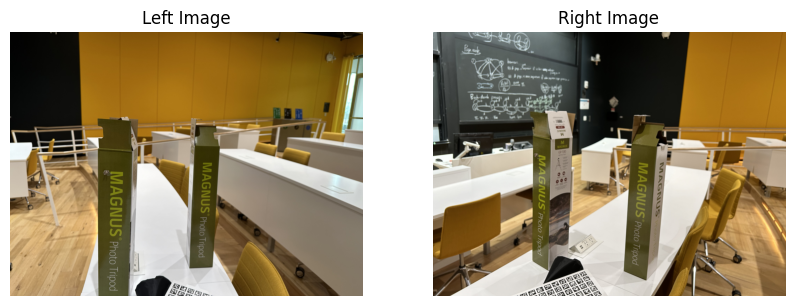

In [ ]:
imgL = cv2.imread(imgL_path)
imgR = cv2.imread(imgR_path)

imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(imgL)
ax[0].set_title('Left Image')
ax[0].axis('off')


ax[1].imshow(imgR)
ax[1].set_title('Right Image')
ax[1].axis('off')

plt.show()

Camera Calibration

17 images:
RMSE of reprojected points: 0.6194851840025355
Distortion coefficients: [[ 0.19612 -0.6897  -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.05  1.    0.06  0.35]
 [ 0.97  0.04  0.22 -5.13]
 [ 0.22  0.07 -0.97 17.54]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[-0.03  0.99 -0.14  0.23]
 [ 0.98  0.05  0.18 -5.1 ]
 [ 0.19 -0.14 -0.97 18.63]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[-0.27  0.87 -0.42  3.23]
 [ 0.94  0.14 -0.32 -7.07]
 [-0.22 -0.48 -0.85 23.77]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

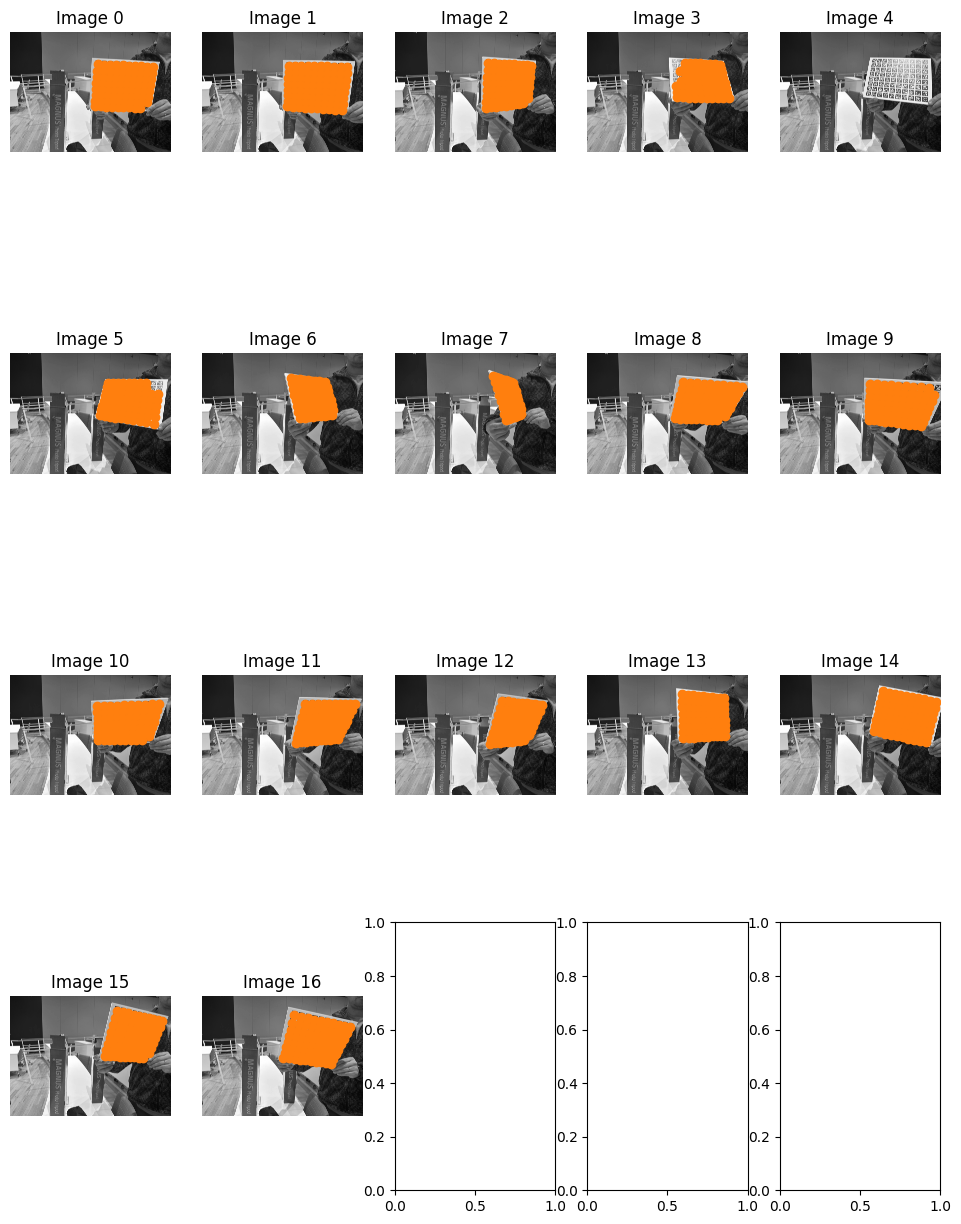

In [ ]:
left_cc = CameraCalibration()
reprojerr_L, calMatrix_L, distCoeffs_L, calRotations_L, calTranslations_L, extrinsic_matrices_L, calObjPoints_L, calImgPoints_L = left_cc.calibrate_camera(calib_left_camera_filepath, True)

17 images:
RMSE of reprojected points: 0.6194851840025355
Distortion coefficients: [[ 0.19612 -0.6897  -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.05  1.    0.06  0.35]
 [ 0.97  0.04  0.22 -5.13]
 [ 0.22  0.07 -0.97 17.54]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[-0.03  0.99 -0.14  0.23]
 [ 0.98  0.05  0.18 -5.1 ]
 [ 0.19 -0.14 -0.97 18.63]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[-0.27  0.87 -0.42  3.23]
 [ 0.94  0.14 -0.32 -7.07]
 [-0.22 -0.48 -0.85 23.77]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

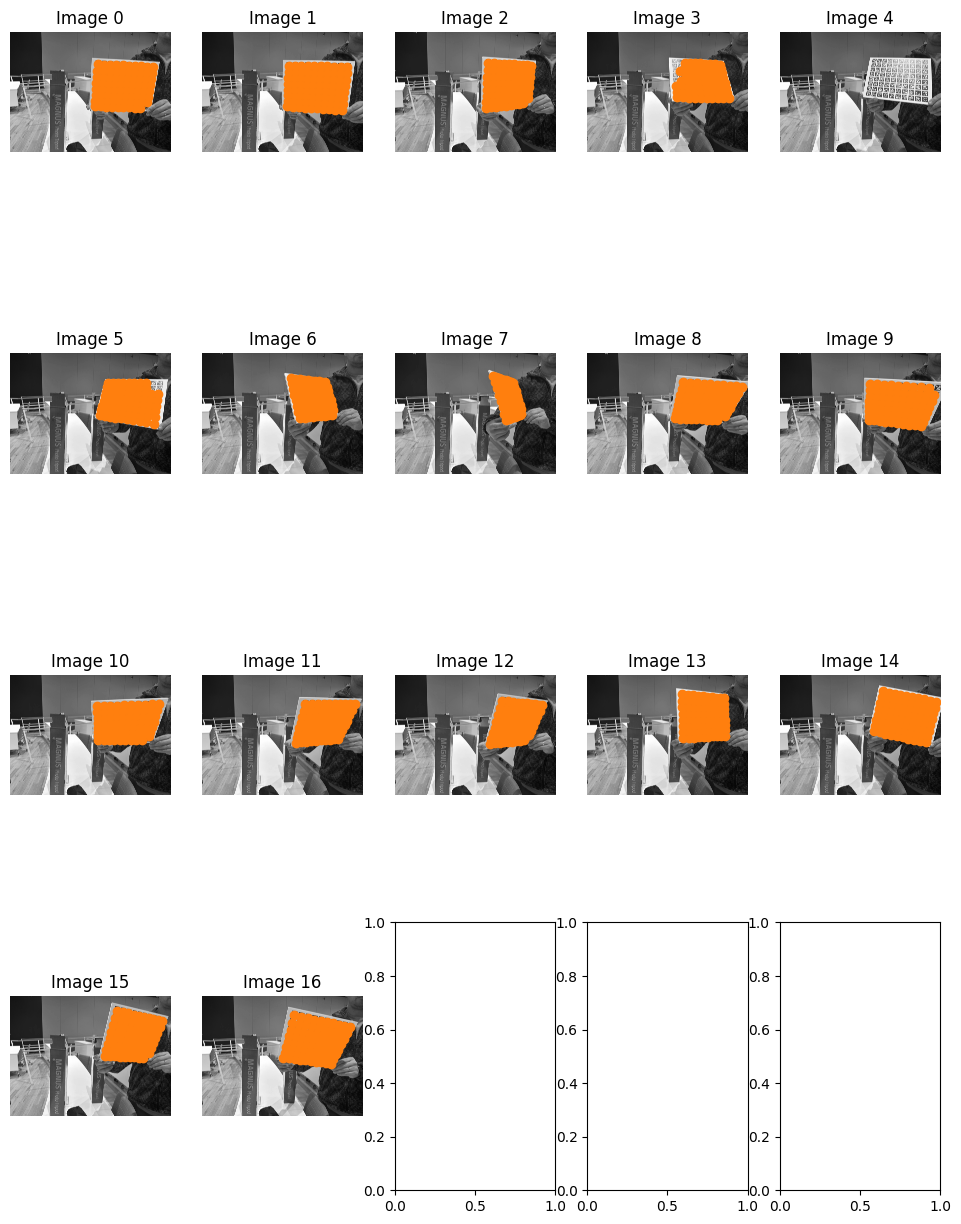

In [ ]:
right_cc = CameraCalibration()
reprojerr_R, calMatrix_R, distCoeffs_R, calRotations_R, calTranslations_R, extrinsic_matrices_R, calObjPoints_R, calImgPoints_R = right_cc.calibrate_camera(calib_left_camera_filepath, True)

In [ ]:
img_shape = (imgR.shape[0], imgR.shape[1])
R, T, E, F = stereo_calibrate(calObjPoints_L, calImgPoints_L, calImgPoints_R, calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, img_shape)

Rotation Matrix (R):
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
Translation Vector (T):
 [[ 0.]
 [-0.]
 [-0.]]
Essential Matrix (E):
 [[-0.  0. -0.]
 [-0.  0. -0.]
 [ 0.  0. -0.]]
Fundamental Matrix (F):
 [[ 6.05e-08 -5.45e+04  1.96e+08]
 [ 5.45e+04 -6.38e-08  7.01e+07]
 [-1.96e+08 -7.01e+07  1.00e+00]]


In [ ]:
R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, imgL.shape[:2], R, T)

map1x, map1y = cv2.initUndistortRectifyMap(calMatrix_L, distCoeffs_L, R1, P1, imgL.shape[:2], cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(calMatrix_R, distCoeffs_R, R2, P2, imgR.shape[:2], cv2.CV_32FC1)

rectified_imgL = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR)
rectified_imgR = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR)


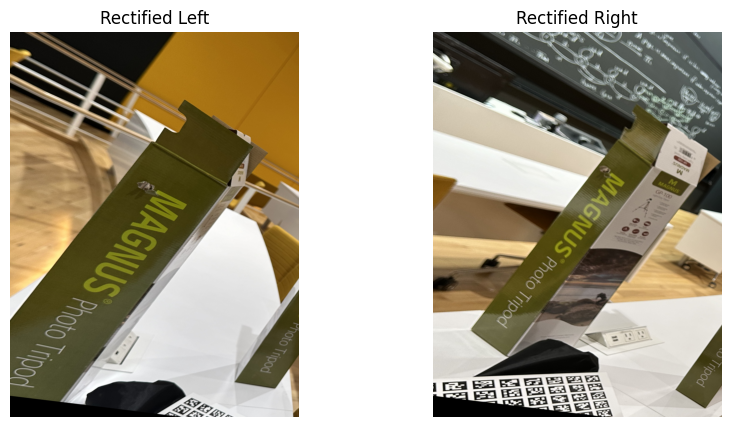

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
ax[0].set_title('Rectified Left')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
ax[1].set_title('Rectified Right')
ax[1].axis('off')

plt.show()

# Winner Takes All

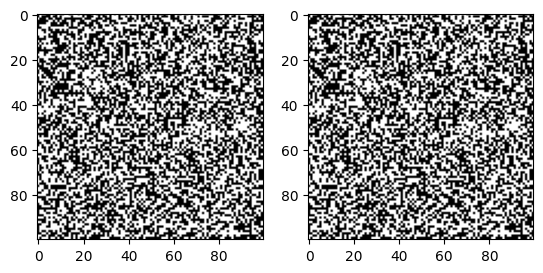

In [4]:
#@title Test code: create synthetic data for WinnerTakesAll()

def create_random_dots_image(width, height):
    # Create an image where each pixel is randomly set to 0 (black) or 255 (white)
    return np.random.choice([0, 255], (height, width), p=[0.5, 0.5]).astype('uint8')

def shift_square_in_image(image, square_size, shift_x):
    # Copy the image to avoid altering the original
    shifted_image = image.copy()

    # Calculate center of the image
    center_y, center_x = image.shape[0] // 2, image.shape[1] // 2

    # Define the top-left corner of the square
    start_y = center_y - square_size // 2
    start_x = center_x - square_size // 2

    # Ensure the square doesn't go out of image boundaries
    if start_x + shift_x >= 0 and start_x + square_size + shift_x < image.shape[1]:
        # Copy and shift the square
        square = image[start_y:start_y + square_size, start_x:start_x + square_size]
        shifted_image[start_y:start_y + square_size, start_x + shift_x:start_x + square_size + shift_x] = square

        # # Fill the original square area with white to simulate the shift visually
        # shifted_image[start_y:start_y + square_size, start_x:start_x + square_size] = 255

    return shifted_image


width, height = 100, 100
square_size = 10
shift_x = -5  # Shift left by 5 pixels

# Generate the left image (random dots)
left_image = create_random_dots_image(width, height)

# Create the right image by shifting a central square in the left image
right_image = shift_square_in_image(left_image, square_size, shift_x)

# Save the images
# cv2.imwrite('left_image.png', left_image)
# cv2.imwrite('right_image.png', right_image)

# Optionally display the images

plt.subplot(1,2,1)
plt.imshow(left_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(right_image, cmap='gray')

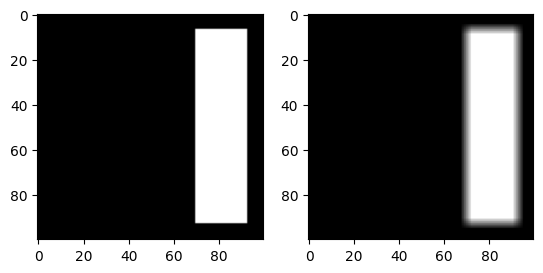

In [7]:
#@title WinnerTakesAll()

def load_images(left_img_path, right_img_path):
    # Load rectified stereo images
    # left_img = cv2.imread(left_img_path, cv2.IMREAD_GRAYSCALE)
    # right_img = cv2.imread(right_img_path, cv2.IMREAD_GRAYSCALE)
    left_img = left_image
    right_img = right_image
    return left_img, right_img

def compute_disparity(left_img, right_img):
    # Create a stereo block matching object
    stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)

    # Compute initial disparity map
    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0
    return disparity

def aggregate_cost(disparity_map, kernel_size=5):
    # Apply a simple box filter for cost aggregation
    aggregated_disparity = cv2.blur(disparity_map, (kernel_size, kernel_size))
    return aggregated_disparity

def normalize_disparity(disparity_map):
    # Normalize disparity for visualization
    disp_norm = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    disp_norm = np.uint8(disp_norm)
    return disp_norm

left_img_path = ''
right_img_path = ''

left_img, right_img = load_images(left_img_path, right_img_path)
initial_disparity = compute_disparity(left_img, right_img)
aggregated_disparity = aggregate_cost(initial_disparity)
normalized_disparity = normalize_disparity(aggregated_disparity)

# Display results
plt.subplot(1,2,1)
plt.imshow(normalize_disparity(initial_disparity), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(normalized_disparity, cmap='gray')
